In [ ]:
!pip install prophet
import prophet
from prophet import Prophet

In [ ]:
import matplotlib as mp1
import matplotlib.pyplot as plt
import numpy as np
import os
from datatime import datetime
import pandas as pd
import plotly.express as px

mp1.rcParams['figure.figsize']=(10, 8)
mp1.rcParams['axes.grid']=False

In [ ]:
!pip install datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib as mp1
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
import pandas as pd
import plotly.express as px

mp1.rcParams['figure.figsize']=(10, 8)
mp1.rcParams['axes.grid']=False

In [ ]:
!apt-get install datetime

In [ ]:
import matplotlib as mp1
import matplotlib.pyplot as plt
import numpy as np
import os
#from datatime import datetime
import pandas as pd
import plotly.express as px

mp1.rcParams['figure.figsize']=(10, 8)
mp1.rcParams['axes.grid']=False

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')

In [ ]:
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [ ]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

In [ ]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [ ]:
df=df.set_index('timestamp').resample("H").mean()

In [ ]:
df

,value
timestamp,
2014-07-01 00:00:00,9485.5
2014-07-01 01:00:00,5433.0
2014-07-01 02:00:00,3346.5
2014-07-01 03:00:00,2216.5
2014-07-01 04:00:00,2189.5
...,...
2015-01-31 19:00:00,28288.5
2015-01-31 20:00:00,24138.0
2015-01-31 21:00:00,24194.5


In [ ]:
fig=px.line(df.reset_index(), x='timestamp', y='value', title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1 ,label="1y",step="year" ,stepmode="backward"),
            dict(count=2 ,label="3y",step="year" ,stepmode="backward"),
            dict(count=3 ,label="5y",step="year" ,stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
from fbprophet import prophet

In [ ]:
taxi_df=df.reset_index()[['timestamp','value']].rename({'timestamp':'ds','value':'y'}, axis='columns')

In [ ]:
taxi_df

,ds,y
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
train=taxi_df[(taxi_df['ds']>= '2014-07-01') & (taxi_df['ds']<= '2015-01-27')]
test=taxi_df[(taxi_df['ds'] > '2015-01-27')]

In [ ]:
train.shape

(5041, 2)

In [ ]:
test.shape

(119, 2)

In [ ]:
test

,ds,y
5041,2015-01-27 01:00:00,39.5
5042,2015-01-27 02:00:00,29.0
5043,2015-01-27 03:00:00,9.5
5044,2015-01-27 04:00:00,14.5
5045,2015-01-27 05:00:00,29.0
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
m= Prophet(changepoint_range=0.95)

In [ ]:
m.fit(train)

In [ ]:
future = m.make_future_dataframe(periods=119,freq='H')
future.tail(167)

,ds
4993,2015-01-25 01:00:00
4994,2015-01-25 02:00:00
4995,2015-01-25 03:00:00
4996,2015-01-25 04:00:00
4997,2015-01-25 05:00:00
...,...
5155,2015-01-31 19:00:00
5156,2015-01-31 20:00:00
5157,2015-01-31 21:00:00
5158,2015-01-31 22:00:00


In [ ]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5155,2015-01-31 19:00:00,23787.251851,18977.297378,28465.519113
5156,2015-01-31 20:00:00,24351.283631,19700.832287,29116.697389
5157,2015-01-31 21:00:00,23227.959429,18820.444569,27941.255010
5158,2015-01-31 22:00:00,21035.983609,16452.974201,25893.076156
5159,2015-01-31 23:00:00,18508.832870,14034.807678,23033.889351


In [ ]:
results=pd.concat([taxi_df.set_index('ds')['y'],forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]],axis=1)

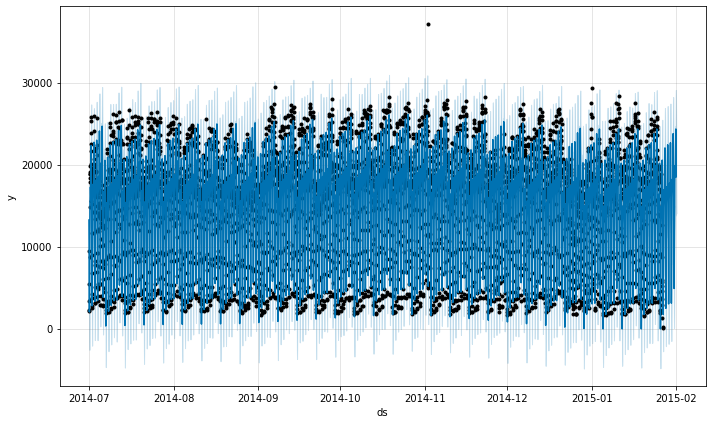

In [ ]:
fig1=m.plot(forecast)

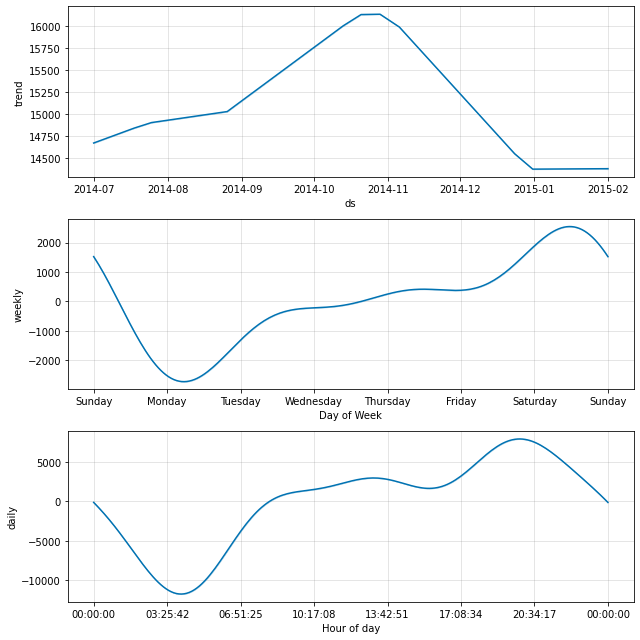

In [ ]:
comp=m.plot_components(forecast)

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2014-07-01 00:00:00,9485.5,13242.228049,8657.083359,17844.731205
2014-07-01 01:00:00,5433.0,10233.968221,5139.047078,14857.235234
2014-07-01 02:00:00,3346.5,6670.549549,1736.836794,11254.095847
2014-07-01 03:00:00,2216.5,3449.448843,-1109.099501,7823.257033
2014-07-01 04:00:00,2189.5,2018.740063,-2593.781198,6994.135575
...,...,...,...,...
2015-01-31 19:00:00,28288.5,23787.251851,18977.297378,28465.519113
2015-01-31 20:00:00,24138.0,24351.283631,19700.832287,29116.697389
2015-01-31 21:00:00,24194.5,23227.959429,18820.444569,27941.255010


In [ ]:
results['error']= results['y']-results['yhat']

In [ ]:
results["uncertainty"] =results['yhat_upper']-results['yhat_lower']

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainty
ds,,,,,,
2014-07-01 00:00:00,9485.5,13242.228049,8657.083359,17844.731205,-3756.728049,9187.647846
2014-07-01 01:00:00,5433.0,10233.968221,5139.047078,14857.235234,-4800.968221,9718.188155
2014-07-01 02:00:00,3346.5,6670.549549,1736.836794,11254.095847,-3324.049549,9517.259053
2014-07-01 03:00:00,2216.5,3449.448843,-1109.099501,7823.257033,-1232.948843,8932.356533
2014-07-01 04:00:00,2189.5,2018.740063,-2593.781198,6994.135575,170.759937,9587.916774
...,...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,23787.251851,18977.297378,28465.519113,4501.248149,9488.221735
2015-01-31 20:00:00,24138.0,24351.283631,19700.832287,29116.697389,-213.283631,9415.865102
2015-01-31 21:00:00,24194.5,23227.959429,18820.444569,27941.255010,966.540571,9120.810441


In [ ]:
results[results['error'].abs() > 1.5*results['uncertainty']]

,y,yhat,yhat_lower,yhat_upper,error,uncertainty
ds,,,,,,
2014-11-02 01:00:00,37204.5,14188.424479,9531.074340,18734.876784,23016.075521,9203.802444
2015-01-01 01:00:00,29292.0,11423.718455,6630.501998,16567.464273,17868.281545,9936.962275
2015-01-01 02:00:00,25753.5,7788.226093,2847.650098,12497.978821,17965.273907,9650.328723
2015-01-01 03:00:00,22067.0,4497.042992,-193.577024,9006.438479,17569.957008,9200.015503
2015-01-26 19:00:00,4565.5,19781.388035,15042.358109,24537.164267,-15215.888035,9494.806159
2015-01-26 20:00:00,3630.5,20556.680435,16004.179753,25474.567888,-16926.180435,9470.388135
2015-01-26 21:00:00,2907.0,19657.815329,15054.832362,24340.263631,-16750.815329,9285.431269
2015-01-26 22:00:00,1324.5,17702.087166,13163.037327,22296.515534,-16377.587166,9133.478208
2015-01-26 23:00:00,243.0,15421.501925,10931.856060,20340.965595,-15178.501925,9409.109535


In [ ]:
results['anomaly']=results.apply(lambda x: 'Yes' if(np.abs(x['error']) > 1.5*x['uncertainty']) else 'No', axis=1)

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainty,anomaly
ds,,,,,,,
2014-07-01 00:00:00,9485.5,13242.228049,8657.083359,17844.731205,-3756.728049,9187.647846,No
2014-07-01 01:00:00,5433.0,10233.968221,5139.047078,14857.235234,-4800.968221,9718.188155,No
2014-07-01 02:00:00,3346.5,6670.549549,1736.836794,11254.095847,-3324.049549,9517.259053,No
2014-07-01 03:00:00,2216.5,3449.448843,-1109.099501,7823.257033,-1232.948843,8932.356533,No
2014-07-01 04:00:00,2189.5,2018.740063,-2593.781198,6994.135575,170.759937,9587.916774,No
...,...,...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,23787.251851,18977.297378,28465.519113,4501.248149,9488.221735,No
2015-01-31 20:00:00,24138.0,24351.283631,19700.832287,29116.697389,-213.283631,9415.865102,No
2015-01-31 21:00:00,24194.5,23227.959429,18820.444569,27941.255010,966.540571,9120.810441,No


In [ ]:
fig =px.scatter(results.reset_index(), x='ds', y='y' ,color='anomaly' ,title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1 ,label="1y",step="year" ,stepmode="backward"),
            dict(count=2 ,label="3y",step="year" ,stepmode="backward"),
            dict(count=3 ,label="5y",step="year" ,stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

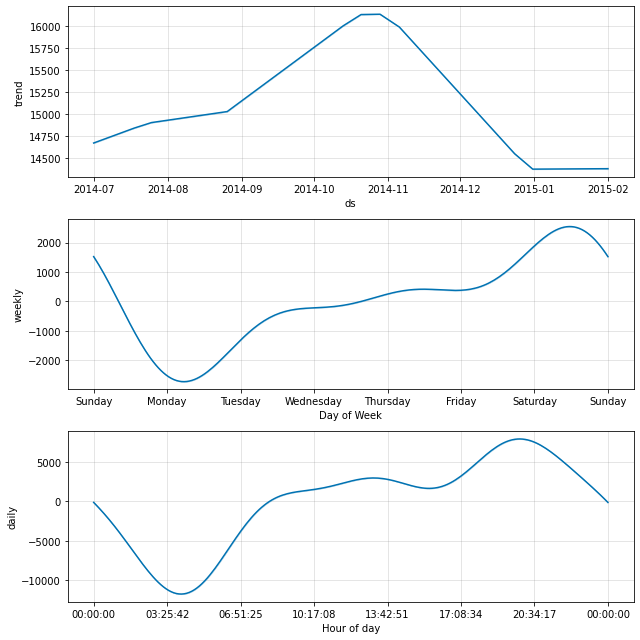

In [ ]:
comp=m.plot_components(forecast)